In [21]:
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import os 
import plotly.express as px
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.utils.multiclass import unique_labels

In [1]:
npath = 'others/occTab_corr_IBGE_Caatinga.csv'
print("path ", npath)
bioma = 'Caatinga'


path  others/occTab_corr_IBGE_Caatinga.csv


In [6]:
dfComp = pd.read_csv(npath)
dfComp = dfComp.drop(['system:index','.geo', 'LAT','LON', 'PESO_AMOS'], axis=1)
print("columnas dfComp" , dfComp.columns)
print("shape of table ", dfComp.shape)
dfComp.head()


columnas dfComp Index(['CLASS_2000', 'CLASS_2010', 'CLASS_2012', 'CLASS_2014', 'CLASS_2016',
       'CLASS_2018', 'CLASS_2020', 'bacia', 'classification_2000',
       'classification_2010', 'classification_2012', 'classification_2014',
       'classification_2016', 'classification_2018', 'classification_2020'],
      dtype='object')
shape of table  (110, 15)


,CLASS_2000,CLASS_2010,CLASS_2012,CLASS_2014,CLASS_2016,CLASS_2018,CLASS_2020,bacia,classification_2000,classification_2010,classification_2012,classification_2014,classification_2016,classification_2018,classification_2020
0,10,10,10,10,10,10,10,741,3,3,3,3,3,3,3
1,18,18,18,18,18,18,18,741,21,21,21,21,21,21,21
2,15,15,15,15,15,15,15,741,21,21,21,21,21,21,21
3,10,10,10,10,10,10,10,741,4,4,4,4,4,4,4
4,4,4,4,4,4,4,4,741,4,4,4,4,4,4,4


In [15]:
lstYears = [
    "2000","2010", "2012",
    "2014","2016", "2018", 
    "2020"
];
dictClass = {
    '3': 3,
    '4': 4,
    '10': 10,
    '15': 21,
    '18': 21,
    '21': 21,
    '22': 22,
    '25': 22,
    '33': 33    
}


In [8]:
dfComp['CLASS_2000'].unique()

array([10, 18, 15,  4,  3, 33])

In [9]:
dfComp['classification_2000'].unique()

array([ 3, 21,  4])

In [16]:

def changeClass_mapbiomas(row):
    for year in lstYears:
        nColumn = 'CLASS_' + year
        nclasse = row[nColumn]
        row[nColumn] = dictClass[str(nclasse)]

    return row
    
dfComp = dfComp.apply(changeClass_mapbiomas, axis= 1)
dfComp.head(5)
        

,CLASS_2000,CLASS_2010,CLASS_2012,CLASS_2014,CLASS_2016,CLASS_2018,CLASS_2020,bacia,classification_2000,classification_2010,classification_2012,classification_2014,classification_2016,classification_2018,classification_2020
0,10,10,10,10,10,10,10,741,3,3,3,3,3,3,3
1,21,21,21,21,21,21,21,741,21,21,21,21,21,21,21
2,21,21,21,21,21,21,21,741,21,21,21,21,21,21,21
3,10,10,10,10,10,10,10,741,4,4,4,4,4,4,4
4,4,4,4,4,4,4,4,741,4,4,4,4,4,4,4


In [17]:

def classification_report_shinny(df_temp):		
	result = []
	result_glob = []
	num_classes = 6
	y_true = df_temp[['reference']].to_numpy().flatten()
	y_pred = df_temp[['classification']].to_numpy().flatten()
	# sample_weight = 1 / df_temp[['prob_amos']].to_numpy().flatten()

	# descartando o pesso das classes de 
	matrixC = confusion_matrix(y_true, y_pred) # sample_weight=sample_weight, 
	print("matrix da funssão \n", matrixC)
	# recalculando a matriz de acurracia 
	#matrix, num_classes = set_all_sum_of_matrix_acc(matrixC)	
	acc_global = round(accuracy_score(y_true, y_pred), 3)
	print("accuracia global ", acc_global)
	return acc_global

In [23]:
lstAcc = []
for year in lstYears:
    colRef = 'CLASS_' + year
    colClass = 'classification_' + year
    df_tmp = dfComp[[colRef, colClass]]
    df_tmp.columns = ['reference', 'classification']
    print("Calculating the Acc of year = " + year)
    accGlobal = classification_report_shinny(df_tmp)
    lstAcc.append(accGlobal)

Calculating the Acc of year = 2000
matrix da funssão 
 [[ 0  0  0  2  0]
 [18 56  0  7  0]
 [ 2  2  0  0  0]
 [ 5  2  0 14  0]
 [ 1  1  0  0  0]]
accuracia global  0.636
Calculating the Acc of year = 2010
matrix da funssão 
 [[ 0  0  0  2  0]
 [18 52  0  7  0]
 [ 2  2  0  0  0]
 [ 5  3  0 17  0]
 [ 1  1  0  0  0]]
accuracia global  0.627
Calculating the Acc of year = 2012
matrix da funssão 
 [[ 0  0  0  2  0]
 [18 52  0  7  0]
 [ 2  2  0  0  0]
 [ 5  3  0 17  0]
 [ 1  0  0  1  0]]
accuracia global  0.627
Calculating the Acc of year = 2014
matrix da funssão 
 [[ 0  0  0  2  0  0]
 [17 52  0  8  0  0]
 [ 2  2  0  0  0  0]
 [ 6  3  0 15  0  0]
 [ 0  0  0  1  0  0]
 [ 1  0  0  1  0  0]]
accuracia global  0.609
Calculating the Acc of year = 2016
matrix da funssão 
 [[ 0  0  0  2  0  0]
 [17 53  0  8  0  0]
 [ 2  2  0  0  0  0]
 [ 6  2  0 15  0  0]
 [ 0  0  0  1  0  0]
 [ 1  0  0  1  0  0]]
accuracia global  0.618
Calculating the Acc of year = 2018
matrix da funssão 
 [[ 0  0  0  2  0  0]
 [

In [25]:
dfAcc = pd.DataFrame.from_dict({
        'years': [int(kk) for kk in lstYears],
        'Accuracy': lstAcc
    })
dfAcc

,years,Accuracy
0,2000,0.636
1,2010,0.627
2,2012,0.627
3,2014,0.609
4,2016,0.618
5,2018,0.627
6,2020,0.618


In [45]:
def plot_Serie_areasEstaveis(df_tmp, titlePlot):
    figBar = px.bar(
        df_tmp, 
        x= 'years', 
        y='Accuracy',
        # color_discrete_map= dict_color,
        # barmode='stack'
    )
    figBar.update_layout(
        # title= dict(
        #         text= titlePlot, 
        #         font=dict(size=20), 
        #         #automargin=True, 
        #         yref='paper',
        #         x= 0.0, 
        #         xanchor="center",
        #         y= 1.0, yanchor="bottom", 
        # ),
        width = 900,
        height = 400,
        # legend_title=nameLegend,
        # legend_title_font_size=15,
        yaxis=dict(
            title='Acurácia IBGE',
            titlefont_size=16,
            tickfont_size=14,
        ),
        xaxis=dict(
            title='Anos da serie historica',
            titlefont_size=16,
            tickfont_size=14,
        ),
        # legend=dict(
        #     orientation="h",
        #     yanchor="bottom",
        #     y=-0.4,
        #     xanchor="right",
        #     x=0.9
        # )
    )
    figBar.update_traces(marker_color='green')
    figBar.show()
    titlePlot = titlePlot.replace(" ", "_")
    print("save as ", titlePlot)
    figBar.write_image("imagePPT/" + titlePlot + '.png')

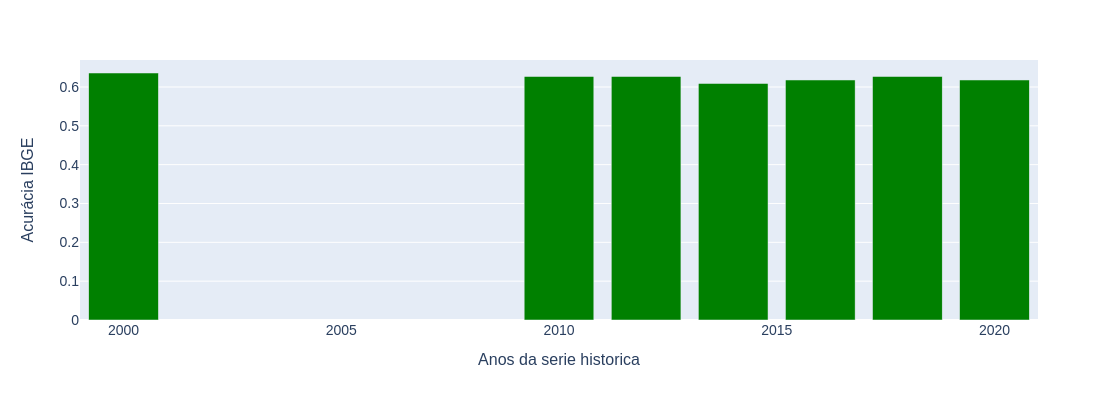

save as  Acurácia_do_mapa_IBGE


In [46]:
plot_Serie_areasEstaveis(dfAcc, "Acurácia do mapa IBGE")